In [200]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deathtrooper/multichannel-glaucoma-benchmark-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/glucoam/.cache/kagglehub/datasets/deathtrooper/multichannel-glaucoma-benchmark-dataset/versions/10


In [201]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys


In [202]:
os.listdir(path)

['optic-cup',
 'spectral-oct-cup',
 'metadata - standardized.csv',
 'vessel-artery',
 'spectral-oct',
 'spectral-oct-disc',
 'full-fundus',
 'optic-disc',
 'blood-vessel',
 'vessel-vein']

In [203]:
pd = pd.read_csv(f"{path}/metadata - standardized.csv")

In [204]:
pd.head()

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,cdr_expert4,refractive_dioptre_1,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect
0,OIA-ODIR-TEST-OFFLINE-1,0,NaN,1,1029_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OIA-ODIR-TEST-OFFLINE-2,0,NaN,1,1049_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-2.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OIA-ODIR-TEST-OFFLINE-4,0,NaN,1,1128_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-4.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OIA-ODIR-TEST-OFFLINE-5,0,NaN,1,1179_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-5.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OIA-ODIR-TEST-OFFLINE-6,0,NaN,1,1180_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-6.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
pd.columns

Index(['names', 'types', 'type_expanded', 'isColor', 'original_name',
       'patient_id', 'fundus', 'fundus_od_seg', 'fundus_oc_seg', 'bv_seg',
       'artery_seg', 'vein_seg', 'oct', 'oct_oc_seg', 'oct_od_seg', 'sex',
       'gender', 'age', 'eye', 'sbp', 'dbp', 'hr', 'iop', 'vcdr',
       'Unnamed: 24', 'notchI_present', 'notchS_present', 'notchN_present',
       'notchT_present', 'expert1_grade', 'expert2_grade', 'expert3_grade',
       'expert4_grade', 'expert5_grade', 'cdr_avg', 'cdr_expert1',
       'cdr_expert2', 'cdr_expert3', 'cdr_expert4', 'refractive_dioptre_1',
       'refractive_dioptre_2', 'refractive_astigmatism',
       'phakic_or_pseudophakic', 'iop_perkins', 'iop_pneumatic', 'pachymetry',
       'axial_length', 'visual_field_mean_defect'],
      dtype='object')

In [206]:
df = pd.drop(['bv_seg',
       'artery_seg', 'vein_seg', 'oct', 'oct_oc_seg', 'oct_od_seg', 'sex',
       'gender', 'age', 'eye', 'sbp', 'dbp', 'hr', 'iop', 'vcdr',
       'Unnamed: 24', 'notchI_present', 'notchS_present', 'notchN_present',
       'notchT_present', 'expert1_grade', 'expert2_grade', 'expert3_grade',
       'expert4_grade', 'expert5_grade', 'cdr_avg', 'cdr_expert1',
       'cdr_expert2', 'cdr_expert3', 'cdr_expert4', 'refractive_dioptre_1',
       'refractive_dioptre_2', 'refractive_astigmatism',
       'phakic_or_pseudophakic', 'iop_perkins', 'iop_pneumatic', 'pachymetry',
       'axial_length', 'visual_field_mean_defect', 'type_expanded', 'isColor', 'original_name',
       'patient_id'], axis=1)

In [207]:
df.head()

,names,types,fundus,fundus_od_seg,fundus_oc_seg
0,OIA-ODIR-TEST-OFFLINE-1,0,/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png,NaN,NaN
1,OIA-ODIR-TEST-OFFLINE-2,0,/full-fundus/OIA-ODIR-TEST-OFFLINE-2.png,NaN,NaN
2,OIA-ODIR-TEST-OFFLINE-4,0,/full-fundus/OIA-ODIR-TEST-OFFLINE-4.png,NaN,NaN
3,OIA-ODIR-TEST-OFFLINE-5,0,/full-fundus/OIA-ODIR-TEST-OFFLINE-5.png,NaN,NaN
4,OIA-ODIR-TEST-OFFLINE-6,0,/full-fundus/OIA-ODIR-TEST-OFFLINE-6.png,NaN,NaN


In [208]:
df = df.dropna(subset=["fundus_od_seg", "fundus_od_seg"])

In [209]:
df.head()

,names,types,fundus,fundus_od_seg,fundus_oc_seg
4546,ORIGA-1,0,/full-fundus/ORIGA-1.png,/optic-disc/ORIGA-1.png,/optic-cup/ORIGA-1.png
4547,ORIGA-2,0,/full-fundus/ORIGA-2.png,/optic-disc/ORIGA-2.png,/optic-cup/ORIGA-2.png
4548,ORIGA-3,0,/full-fundus/ORIGA-3.png,/optic-disc/ORIGA-3.png,/optic-cup/ORIGA-3.png
4549,ORIGA-4,0,/full-fundus/ORIGA-4.png,/optic-disc/ORIGA-4.png,/optic-cup/ORIGA-4.png
4550,ORIGA-5,0,/full-fundus/ORIGA-5.png,/optic-disc/ORIGA-5.png,/optic-cup/ORIGA-5.png


In [210]:
df.shape

(3103, 5)

In [211]:
sys.path.append("/Users/glucoam/Desktop/Glucoma")

from utils.main import create_dir, check_file, loc_mask

In [212]:
create_dir("./data/cropped")
create_dir("./data/normal")

In [213]:
import shutil

In [214]:
for item in df["names"]:
    img = cv2.imread(f"{path}/full-fundus/full-fundus/{item}.png")
    create_dir("./data/normal/full-fundus")
    cv2.imwrite(f"/Users/glucoam/Desktop/Glucoma/data/normal/full-fundus/{item}.png", img)

    if check_file(f"{path}/optic-cup/optic-cup/{item}.png"):
        create_dir("./data/normal/optic-cup")
        oc_img = cv2.imread(f"{path}/optic-cup/optic-cup/{item}.png")
        if not check_file(f"./data/normal/optic-cup/{item}.png"):
            cv2.imwrite(f"./data/normal/optic-cup/{item}.png",oc_img)
    
    if check_file(f"{path}/optic-disc/optic-disc/{item}.png"):
        create_dir("./data/normal/optic-disc")
        od_img = cv2.imread(f"{path}/optic-disc/optic-disc/{item}.png")
        if not check_file(f"./data/normal/optic-disc/{item}.png"):
            cv2.imwrite(f"./data/normal/optic-disc/{item}.png", od_img)


In [215]:
print('Full Fundus Images : ', len(os.listdir("./data/normal/full-fundus")))
print("Optic Cup Images : ", len(os.listdir("./data/normal/optic-cup")))
print("Optic Disc Images : ", len(os.listdir("./data/normal/optic-disc")))

Full Fundus Images :  3104
Optic Cup Images :  2873
Optic Disc Images :  3103


In [216]:
cnt = 0
for item in df["names"]:
    x1, x2, x3, x4 = 0, 0, 0, 0
    if not check_file(f"./data/cropped/optic-disc/{item}.png"):
        create_dir("./data/cropped/optic-disc")
        if check_file(f"./data/normal/optic-disc/{item}.png"):
            disc_mask = cv2.imread(f"./data/normal/optic-disc/{item}.png", 0)
            x1, x2, y1, y2 = loc_mask(disc_mask)
            crop_img = disc_mask[y1:y2, x1:x2]
            if crop_img is None or crop_img.size == 1 or crop_img.shape[0] == 0 or crop_img.shape[1] == 0:
                cnt = cnt + 1
                # print("Skip Image")
                continue
            cv2.imwrite(f"./data/cropped/optic-disc/{item}.png", crop_img)
    
    if not check_file(f"./data/cropped/optic-cup/{item}.png"):
        create_dir("./data/cropped/optic-cup")
        if check_file(f"./data/normal/optic-cup/{item}.png"):
            cup_mask = cv2.imread(f"./data/normal/optic-cup/{item}.png", 0)
            crop_img = cup_mask[y1:y2, x1:x2]
            cv2.imwrite(f"./data/cropped/optic-cup/{item}.png", crop_img)

    if not check_file(f"./data/cropped/full-fundus/{item}.png"):
        create_dir("./data/cropped/full-fundus")
        if check_file(f"./data/normal/full-fundus/{item}.png"):
            og_img = cv2.imread(f"./data/normal/full-fundus/{item}.png")
            crop_img = og_img[y1:y2, x1:x2]
            cv2.imwrite(f"./data/cropped/full-fundus/{item}.png", crop_img)

print("Total Loss of images is : ", cnt)

Total Loss of images is :  34


In [217]:
print('Full Fundus Images : ', len(os.listdir("./data/cropped/full-fundus")))
print("Optic Cup Images : ", len(os.listdir("./data/cropped/optic-cup")))
print("Optic Disc Images : ", len(os.listdir("./data/cropped/optic-disc")))

Full Fundus Images :  3069
Optic Cup Images :  2843
Optic Disc Images :  3069


In [218]:
print("Percentage total loss is : ", ((2873 - 2843)/2873)*100)

Percentage total loss is :  1.0442046641141665


In [219]:
IMG_SIZE = 256

In [220]:
og_img = []
optic_disc = []
optic_cup = []

for item in df["names"]:
    if check_file(f"./data/cropped/optic-cup/{item}.png"):
        img = cv2.imread(f"./data/cropped/full-fundus/{item}.png")
        oc_img = cv2.imread(f"./data/cropped/optic-cup/{item}.png")
        od_img = cv2.imread(f"./data/cropped/optic-disc/{item}.png")

        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        oc_img = cv2.resize(oc_img, (IMG_SIZE, IMG_SIZE))
        od_img = cv2.resize(od_img, (IMG_SIZE,IMG_SIZE))

        og_img.append(img)
        optic_disc.append(od_img)
        optic_cup.append(od_img)

print("Size of img : ", len(og_img))
print("Size of optic_cup : ", len(optic_disc))
print("Size of optic_disc : ", len(optic_cup))

og_img[0].shape

Size of img :  2843
Size of optic_cup :  2843
Size of optic_disc :  2843


(256, 256, 3)

In [221]:
og_img = np.array(og_img)
optic_disc = np.array(optic_disc)
optic_cup = np.array(optic_cup)

In [222]:
og_img = np.expand_dims(og_img, axis=-1)
optic_disc = np.expand_dims(optic_disc, axis=-1)
optic_cup = np.expand_dims(optic_cup, axis=-1)

print(og_img.shape, " ", optic_disc.shape, " ", optic_cup.shape)

(2843, 256, 256, 3, 1)   (2843, 256, 256, 3, 1)   (2843, 256, 256, 3, 1)


In [223]:
og_img = og_img.astype("float32") / 255.0
optic_disc = optic_disc.astype("float32") / 255.0
optic_cup = optic_cup.astype("float32") / 255.0

In [224]:
print("Size of img : ", og_img.dtype)
print("Size of optic_cup : ", optic_disc.dtype)
print("Size of optic_disc : ", optic_cup.dtype)

Size of img :  float32
Size of optic_cup :  float32
Size of optic_disc :  float32


In [225]:
from sklearn.model_selection import train_test_split

In [226]:
print(np.__version__)

1.26.4


In [227]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, BatchNormalization
from tensorflow.keras.models import Model

# U-Net Setup

In [228]:
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 1))

In [229]:
# Encoder
conv1 = Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
conv1 = Conv2D(64, (3, 3), activation="relu", padding="same")(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(128, (3, 3), activation="relu", padding="same")(pool1)
conv2 = Conv2D(128, (3, 3), activation="relu", padding="same")(conv2)
pool2 = MaxPooling2D((2,2))(conv2)

conv3 = Conv2D(256, (3, 3), activation="relu", padding="same")(pool2)
conv3 = Conv2D(256, (3,3), activation="relu", padding="same")(conv3)
pool3 = MaxPooling2D((2,2))(conv3)

conv4 = Conv2D(512, (3, 3), activation="relu", padding="same")(pool3)
conv4 = Conv2D(512, (3,3), activation="relu", padding="same")(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)

# Bottleneck
bottleneck = Conv2D(1024, (3,3), activation="relu", padding="same")(pool4)
bottleneck = Conv2D(1024, (3,3), activation="relu", padding="same")(bottleneck)

# Decoder
upConv1 = Conv2DTranspose(512, (2,2), strides=2, padding="same")(bottleneck)
concat1 = concatenate([upConv1, conv4])
conv5 = Conv2D(512, (3,3), activation="relu", padding="same")(concat1)
conv5 = Conv2D(512, (3, 3), activation="relu", padding="same")(conv5)

upConv2 = Conv2DTranspose(256, (2, 2), strides=2, padding="same")(conv5)
concat2 = concatenate([upConv2, conv3])
conv6 = Conv2D(256, (3,3), activation="relu", padding="same")(concat2)
conv6 = Conv2D(256, (3, 3), activation="relu", padding="same")(conv6)

upConv3 = Conv2DTranspose(128, (2, 2), strides=2, padding="same")(conv6)
concat3 = concatenate([upConv3, conv2])
conv7 = Conv2D(128, (3,3), activation="relu", padding="same")(concat3)
conv7 = Conv2D(128, (3, 3), activation="relu", padding="same")(conv7)

upConv4 = Conv2DTranspose(64, (2, 2), strides=2, padding="same")(conv7)
concat4 = concatenate([upConv4, conv1])
conv8 = Conv2D(64, (3,3), activation="relu", padding="same")(concat4)
conv8 = Conv2D(64, (3, 3), activation="relu", padding="same")(conv8)

# Output: 2 channels (Disc + Cup) with sigmoid
outputs = Conv2D(1, (1,1), activation="sigmoid")(conv8)

model = Model(inputs, outputs)

In [230]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_76 (Conv2D)          (None, 256, 256, 64)         640       ['input_5[0][0]']             
                                                                                                  
 conv2d_77 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_76[0][0]']           
                                                                                                  
 max_pooling2d_16 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_77[0][0]']           
 ng2D)                                                                                      

In [231]:
X_train, X_test, y_train, y_test = train_test_split(og_img, optic_disc, train_size=0.1)

In [232]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [233]:
# history = model.fit(X_train, y_train, epochs=40, batch_size=8, validation_data=(X_test, y_test), verbose=1)

In [234]:

os.environ["SM_FRAMEWORK"] = "tf.keras"


In [235]:
import segmentation_models as sm

In [236]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [237]:
pre_train_model = sm.Unet(
    backbone_name="resnet34",
    encoder_weights="imagenet",
    classes=1,
    activation="sigmoid"
)

In [238]:
loss = sm.losses.DiceLoss()
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5), "accuracy"]

In [239]:
import tensorflow as tf

In [240]:
pre_train_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=loss,
    metrics=metrics
)

In [241]:
pre_train_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, None, None, 3)]      0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, None, None, 3)        9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d_68 (ZeroPad  (None, None, None, 3)        0         ['bn_data[0][0]']             
 ding2D)                                                                                          
                                                                                           

In [242]:
history = pre_train_model.fit(
    X_train, y_train,
    batch_size=4,
    epochs=40,
    validation_split=0.1
)

Epoch 1/40


2025-11-19 11:57:43.440401: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


64/64 [==============================] - 21s 186ms/step - loss: 0.2331 - iou_score: 0.8070 - f1-score: 0.8880 - accuracy: 0.8409 - val_loss: 0.2916 - val_iou_score: 0.8143 - val_f1-score: 0.8976 - val_accuracy: 0.8463
Epoch 2/40
64/64 [==============================] - 10s 151ms/step - loss: 0.1199 - iou_score: 0.9103 - f1-score: 0.9529 - accuracy: 0.9076 - val_loss: 0.2573 - val_iou_score: 0.7628 - val_f1-score: 0.8653 - val_accuracy: 0.8447
Epoch 3/40
64/64 [==============================] - 10s 152ms/step - loss: 0.0883 - iou_score: 0.9234 - f1-score: 0.9601 - accuracy: 0.9139 - val_loss: 0.1299 - val_iou_score: 0.8733 - val_f1-score: 0.9324 - val_accuracy: 0.8912
Epoch 4/40
64/64 [==============================] - 10s 151ms/step - loss: 0.0697 - iou_score: 0.9333 - f1-score: 0.9655 - accuracy: 0.9178 - val_loss: 0.1095 - val_iou_score: 0.8674 - val_f1-score: 0.9290 - val_accuracy: 0.8874
Epoch 5/40
64/64 [==============================] - 10s 152ms/step - loss: 0.0586 - iou_score: 

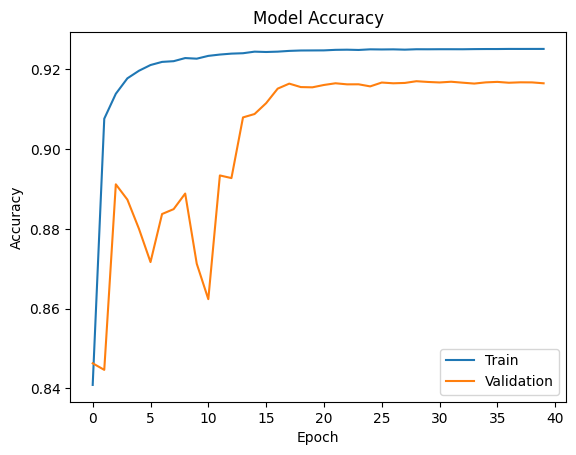

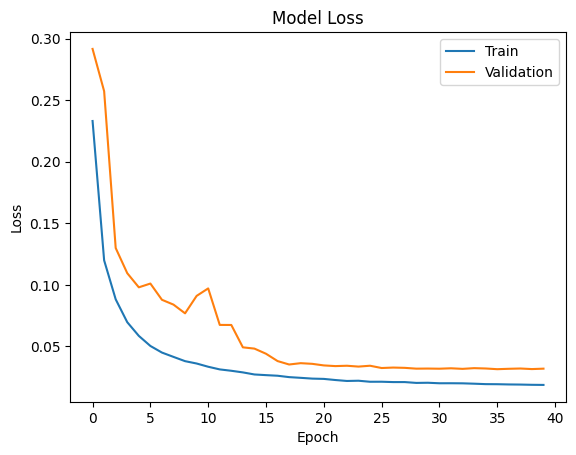

In [243]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [244]:
import pickle

In [245]:
pre_train_model.save("./dist/u_net_pre_train_disc_main_img_net.keras")


pre_train_model.save_weights("./dist/u_net_pre_train_disc_main_img_net.weights.h5")

In [246]:
test_img = cv2.imread('/Users/glucoam/Desktop/Glucoma/data/test/CRFO-v4-2 - Edited.png')

In [247]:
r_test_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))

In [248]:
r_test_img.shape

(256, 256, 3)

In [249]:
t_img = []

t_img.append(r_test_img)

In [250]:
t_img_tensor = np.array(t_img)

In [251]:
t_img_tensor = t_img_tensor.astype("float32") / 255.0

In [252]:
pred_mask = pre_train_model.predict(t_img_tensor)

1/1 [==============================] - 1s 717ms/step


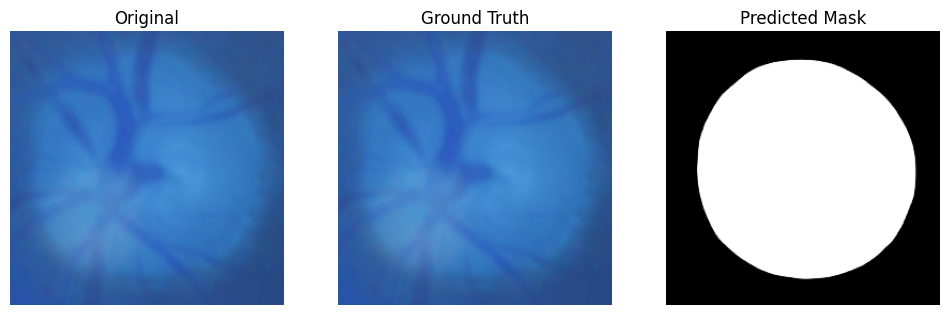

In [253]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(r_test_img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ground Truth")
plt.imshow(r_test_img)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Predicted Mask")
plt.imshow(pred_mask[0].squeeze(), cmap="gray")
plt.axis("off")

plt.show()
